In [1]:
# Imports
import os
import sys
import glob
import re

# Third party imports
import numpy as np
import xarray as xr
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [2]:
# Import dictionaries
sys.path.append('/home/users/benhutch/skill-maps')
import dictionaries as dict

# Import functions
import functions as func

# Import the NAO functions
import nao_skill_functions as nao_func

# Import nao matching functions
sys.path.append('/home/users/benhutch/skill-maps/rose-suite-matching')
from nao_matching_seasons import match_variable_models, find_obs_path

### NAO skill exploration ###

* Create a subplot with 6 rows and 2 columns, containing the NAO 8-year running means (years 2-9 forecast) for psl.
* Shift the x-axis to be aligned with initialisation year
* Grab as many years as possible (final 8 year running mean for obs 2016-2023 inclusive)
* Present in terms of long region and short region
* Also consider temperature of subpolar gyre for different models

In [3]:
# Set up the arguments for psl
psl_models = dict.models
obs_path_psl = dict.obs
base_dir = dict.base_dir
plots_dir = "/gws/nopw/j04/canari/users/benhutch/plots/NAO_skill"
save_dir = dict.save_dir # Where the NAO-matched data are saved
global_grid = dict.gridspec_global
psl_var_name = "psl"

In [4]:
# Process the global psl anomalies to be used for the NAO index
obs_psl_anom = func.read_obs(variable='psl',
                            region='global',
                            forecast_range='2-9',
                            season="DJFM",
                            observations_path=obs_path_psl,
                            start_year=1960,
                            end_year=2023)

Time dimension of obs: ['1960-12-31T00:00:00.000000000' '1961-12-31T00:00:00.000000000'
 '1962-12-31T00:00:00.000000000' '1963-12-31T00:00:00.000000000'
 '1964-12-31T00:00:00.000000000' '1965-12-31T00:00:00.000000000'
 '1966-12-31T00:00:00.000000000' '1967-12-31T00:00:00.000000000'
 '1968-12-31T00:00:00.000000000' '1969-12-31T00:00:00.000000000'
 '1970-12-31T00:00:00.000000000' '1971-12-31T00:00:00.000000000'
 '1972-12-31T00:00:00.000000000' '1973-12-31T00:00:00.000000000'
 '1974-12-31T00:00:00.000000000' '1975-12-31T00:00:00.000000000'
 '1976-12-31T00:00:00.000000000' '1977-12-31T00:00:00.000000000'
 '1978-12-31T00:00:00.000000000' '1979-12-31T00:00:00.000000000'
 '1980-12-31T00:00:00.000000000' '1981-12-31T00:00:00.000000000'
 '1982-12-31T00:00:00.000000000' '1983-12-31T00:00:00.000000000'
 '1984-12-31T00:00:00.000000000' '1985-12-31T00:00:00.000000000'
 '1986-12-31T00:00:00.000000000' '1987-12-31T00:00:00.000000000'
 '1988-12-31T00:00:00.000000000' '1989-12-31T00:00:00.000000000'
 '

/apps/jasmin/jaspy/miniconda_envs/jaspy3.10/m3-4.9.2/envs/jaspy3.10-m3-4.9.2-r20220721/lib/python3.10/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


In [5]:
# Load and process the model psl anomalies to be used for the NAO index
model_datasets_psl = func.load_data(base_directory=base_dir,
                                    models=psl_models,
                                    variable=psl_var_name,
                                    region='global',
                                    forecast_range='2-9',
                                    season="DJFM")

# Process the model psl anomalies to be used for the NAO index
model_psl_anom, _ = func.process_data(datasets_by_model=model_datasets_psl,
                                    variable=psl_var_name)

In [6]:
# Remove years containing NaNs from the obs and model datasets
obs_psl_anom, \
model_data_psl, _ = func.remove_years_with_nans_nao(observed_data=obs_psl_anom,
                                                    model_data=model_psl_anom,
                                                    models=psl_models,
                                                    NAO_matched=False)

No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN v

1961 all NaN values for this year
1962 all NaN values for this year
1963 all NaN values for this year
1964 no NaN values for this year
1965 no NaN values for this year
1966 no NaN values for this year
1967 no NaN values for this year
1968 no NaN values for this year
1969 no NaN values for this year
1970 no NaN values for this year
1971 no NaN values for this year
1972 no NaN values for this year
1973 no NaN values for this year
1974 no NaN values for this year
1975 no NaN values for this year
1976 no NaN values for this year
1977 no NaN values for this year
1978 no NaN values for this year
1979 no NaN values for this year
1980 no NaN values for this year
1981 no NaN values for this year
1982 no NaN values for this year
1983 no NaN values for this year
1984 no NaN values for this year
1985 no NaN values for this year
1986 no NaN values for this year
1987 no NaN values for this year
1988 no NaN values for this year
1989 no NaN values for this year
1990 no NaN values for this year
1991 no

In [7]:
print("model nao:", model_data_psl)

model nao: {'BCC-CSM2-MR': [<xarray.DataArray 'psl' (time: 54, lat: 72, lon: 144)>
dask.array<open_dataset-b206702938a6823e1230ea2397431ce1psl, shape=(54, 72, 144), dtype=float32, chunksize=(50, 72, 100), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1966-08-01 00:00:00 ... 2019-08-01 00:00:00
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 80.0 82.5 85.0 87.5
Attributes:
    CDI:                    Climate Data Interface version 2.0.4 (https://mpi...
    Conventions:            CF-1.7 CMIP-6.2
    source:                 BCC-CSM 2 MR (2017):   aerosol: none  atmos: BCC_...
    institution:            Beijing Climate Center, Beijing 100081, China
    activity_id:            DCPP
    branch_method:          no parent
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    comment:                The model 10-year-long hindcast integration start...
    contact:        

In [8]:
# import importlib
import importlib

# Import the function again so as not to have to restart the kernel
importlib.reload(sys.modules['nao_skill_functions'])

# Import the functions again
from nao_skill_functions import nao_stats

# Import the dictionary again
importlib.reload(sys.modules['dictionaries'])

# import from the dictionary again
import dictionaries as dict


In [9]:
# test the new function
nao_stats_dict = nao_stats(obs=obs_psl_anom,
                        hindcast=model_data_psl,
                        models_list=psl_models,
                        lag=4,
                        short_period=(1965, 2010),
                        season="DJFM")

Setting up the NAO stats for the BCC-CSM2-MR model
years checking complete for the BCC-CSM2-MR model
The years in the observations are not the same as the years in the hindcast data for the BCC-CSM2-MR model
Obs first year: 1965
Hindcast first year: 1966
Obs last year: 2019
Hindcast last year: 2019
years checking complete for the observations and the BCC-CSM2-MR model
years_short: [1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010]


NAO index calculated for the BCC-CSM2-MR model
Setting up the NAO stats for the MPI-ESM1-2-HR model
years checking complete for the MPI-ESM1-2-HR model
years checking complete for the observations and the MPI-ESM1-2-HR model
years_short: [1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010]
NAO index calculated for the MPI-ESM1-2-HR model
Setting up the NAO stats for the CanESM5 model
years checking complete for the CanESM5 model
years checking complete for the observations and the CanESM5 model
years_short: [1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010]
NAO index calculated for the CanESM5 model
Setting up the NAO stats fo

In [10]:
print(nao_stats_dict['NorCPM1']['model_nao_ts_short_max'])

[281.56160889 409.5734375  434.87177124 325.32126312 377.11216125
 485.04417114 294.21824341 327.22789154 217.80231781 415.00263367
 325.67597656 369.19693909 303.66878204 275.21725464 272.34604797
 213.76314468 202.05985794 318.37583008 231.94996033 235.9326828
 216.97339249 244.73343048 383.61463165 399.66721039 433.25358734
 293.8491272  172.14373398 407.84489594 306.89427032 338.66097717
 258.10544586 363.16845703 191.94739609 474.06601563 271.7392746
 477.13045044 358.94806976 399.63188477 363.71525116 301.97325134
 399.58603516 315.83442078 305.01750946 225.98646317 308.43008728
 374.90865173]


In [11]:
# import importlib
import importlib

# Import the function again so as not to have to restart the kernel
importlib.reload(sys.modules['nao_skill_functions'])

# Import the functions again
from nao_skill_functions import nao_stats, plot_subplots_ind_models

# Import the dictionary again
importlib.reload(sys.modules['dictionaries'])

# import from the dictionary again
import dictionaries as dict


Plotting the short period
Plotting the raw NAO index


Plotting the BCC-CSM2-MR model
At index 0 of the axes
Plotting the short period and the raw NAO index
Plotting member 0
NAO index extracted for member 0
Plotting member 1
NAO index extracted for member 1
Plotting member 2
NAO index extracted for member 2
Plotting member 3
NAO index extracted for member 3
Plotting member 4
NAO index extracted for member 4
Plotting member 5
NAO index extracted for member 5
Plotting member 6
NAO index extracted for member 6
Plotting member 7
NAO index extracted for member 7
Plotting the MPI-ESM1-2-HR model
At index 1 of the axes
Plotting the short period and the raw NAO index
Plotting member 0
NAO index extracted for member 0
Plotting member 1
NAO index extracted for member 1
Plotting member 2
NAO index extracted for member 2
Plotting member 3
NAO index extracted for member 3
Plotting member 4
NAO index extracted for member 4
Plotting member 5
NAO index extracted for member 5
Plotting member 6
NAO index extracted for member 6
Plotting member 7
NAO index e

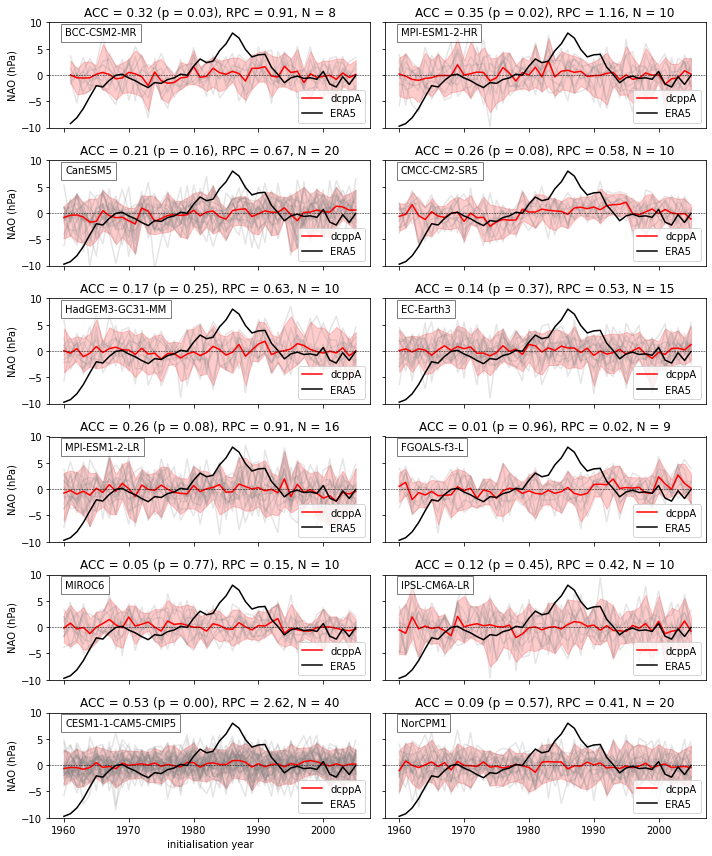

In [12]:
# test the new plotting function
plot_subplots_ind_models(nao_stats_dict=nao_stats_dict,
                        models_list=psl_models,
                        short_period=True,
                        lag_and_var_adjust=False)

Plotting the long period
Plotting the raw NAO index
Plotting the BCC-CSM2-MR model
At index 0 of the axes
Plotting the long period and the raw NAO index
Plotting member 0
NAO index extracted for member 0
Plotting member 1
NAO index extracted for member 1
Plotting member 2
NAO index extracted for member 2
Plotting member 3
NAO index extracted for member 3
Plotting member 4
NAO index extracted for member 4
Plotting member 5
NAO index extracted for member 5
Plotting member 6
NAO index extracted for member 6
Plotting member 7
NAO index extracted for member 7
Plotting the MPI-ESM1-2-HR model
At index 1 of the axes
Plotting the long period and the raw NAO index
Plotting member 0
NAO index extracted for member 0
Plotting member 1
NAO index extracted for member 1
Plotting member 2
NAO index extracted for member 2
Plotting member 3
NAO index extracted for member 3
Plotting member 4
NAO index extracted for member 4
Plotting member 5
NAO index extracted for member 5
Plotting member 6
NAO index ex

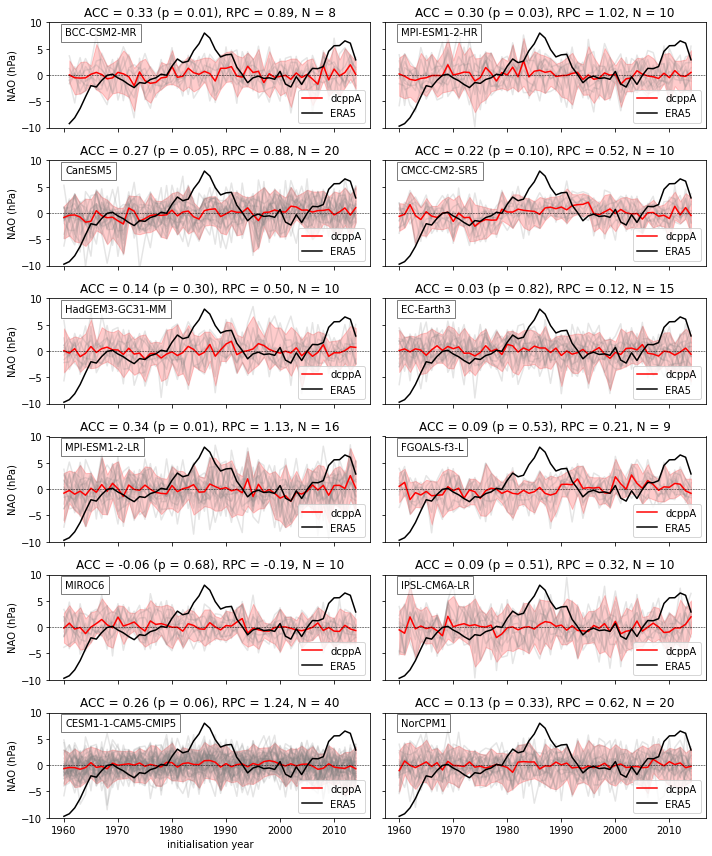

In [13]:
# Now for the raw plot, but for the long period
plot_subplots_ind_models(nao_stats_dict=nao_stats_dict,
                        models_list=psl_models,
                        short_period=False,
                        lag_and_var_adjust=False)

Plotting the short period
Plotting the lag and variance adjusted NAO index
Plotting the BCC-CSM2-MR model
At index 0 of the axes
Plotting the short period and the lag and variance adjusted NAO index
Plotting member 0
NAO index extracted for member 0
Plotting member 1
NAO index extracted for member 1
Plotting member 2
NAO index extracted for member 2
Plotting member 3
NAO index extracted for member 3
Plotting member 4
NAO index extracted for member 4
Plotting member 5
NAO index extracted for member 5
Plotting member 6
NAO index extracted for member 6
Plotting member 7
NAO index extracted for member 7
Plotting member 8
NAO index extracted for member 8
Plotting member 9
NAO index extracted for member 9
Plotting member 10
NAO index extracted for member 10
Plotting member 11
NAO index extracted for member 11
Plotting member 12
NAO index extracted for member 12
Plotting member 13
NAO index extracted for member 13
Plotting member 14
NAO index extracted for member 14
Plotting member 15
NAO ind

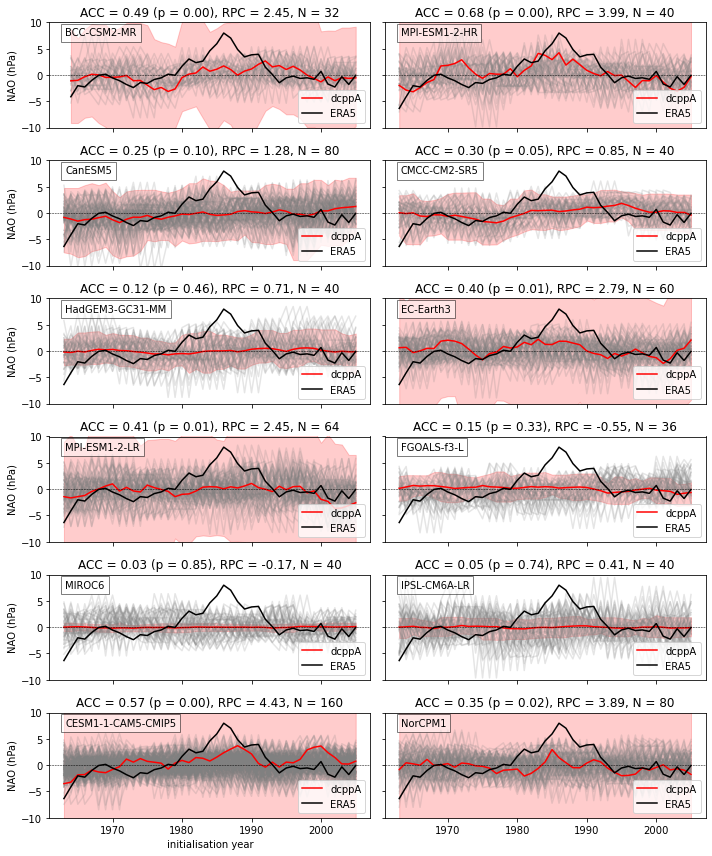

In [14]:
# Now for the short period, but with the lag and variance adjustment
plot_subplots_ind_models(nao_stats_dict=nao_stats_dict,
                        models_list=psl_models,
                        short_period=True,
                        lag_and_var_adjust=True)

Plotting the long period
Plotting the lag and variance adjusted NAO index
Plotting the BCC-CSM2-MR model
At index 0 of the axes
Plotting the long period and the lag and variance adjusted NAO index
Plotting member 0
NAO index extracted for member 0
Plotting member 1
NAO index extracted for member 1
Plotting member 2
NAO index extracted for member 2
Plotting member 3
NAO index extracted for member 3
Plotting member 4
NAO index extracted for member 4
Plotting member 5
NAO index extracted for member 5
Plotting member 6
NAO index extracted for member 6
Plotting member 7
NAO index extracted for member 7
Plotting member 8
NAO index extracted for member 8
Plotting member 9
NAO index extracted for member 9
Plotting member 10
NAO index extracted for member 10
Plotting member 11
NAO index extracted for member 11
Plotting member 12
NAO index extracted for member 12
Plotting member 13
NAO index extracted for member 13
Plotting member 14
NAO index extracted for member 14
Plotting member 15
NAO index

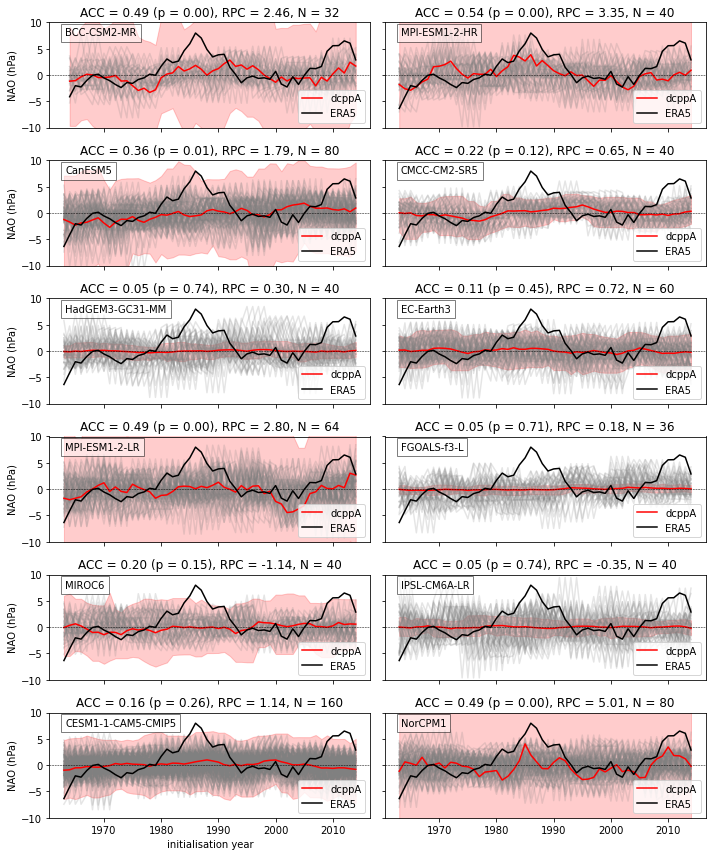

In [15]:
# Now for the long period, but with the lag and variance adjustment
plot_subplots_ind_models(nao_stats_dict=nao_stats_dict,
                        models_list=psl_models,
                        short_period=False,
                        lag_and_var_adjust=True)